In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")

Skipping, found downloaded files in "./brain-tumor-classification-mri" (use force=True to force download)


In [ ]:
import pickle

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt

In [ ]:
DIRECTORY = "/content/brain-tumor-classification-mri/Training"
categories = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

glioma_tumor: 0
meningioma_tumor: 1
no_tumor: 2
pituitary_tumor: 3


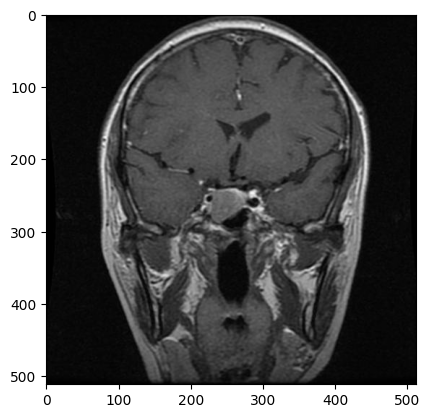

In [ ]:

IMAGE_SIZE = 255
data = []

for category in categories:
  folders = os.path.join(DIRECTORY,category)
  label = categories.index(category)
  print(f"{category}:",label)

  for img in os.listdir(folders):
    img_path = os.path.join(folders,img)
    img_arr = cv2.imread(img_path)
    img_arr_resize = cv2.resize(img_arr,(IMAGE_SIZE,IMAGE_SIZE))
    plt.imshow(img_arr)
    #break
    data.append([img_arr_resize,label])



In [ ]:
len(data)

2870

In [ ]:
random.shuffle(data)

In [ ]:
data[0]

[array([[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1]],
 
        [[ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1]],
 
        ...,
 
        [[ 2,  2,  2],
         [ 7,  7,  7],
         [10, 10, 10],
         ...,
         [ 3,  3,  3],
         [ 3,  3,  3],
         [ 3,  3,  3]],
 
        [[ 2,  2,  2],
         [ 6,  6,  6],
         [ 8,  8,  8],
         ...,
         [ 2,  2,  2],
         [ 2,  2,  2],
         [ 2,  2,  2]],
 
        [[ 3,  3,  3],
         [ 6,  6,  6],
         [ 8,  8,  8],
         ...,
         [ 1,  1,  1],
         [ 1,  1,  1],
         [ 1,  1,  1]]], dtype=uint8),
 2]

In [ ]:
x= []
y =[]
for features,labels in data:
  x.append(features)
  y.append(labels)


In [ ]:
len(x)

2870

In [ ]:
len(y)

2870

In [ ]:
y

[2,
 0,
 3,
 3,
 1,
 0,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 3,
 1,
 2,
 0,
 0,
 3,
 0,
 0,
 3,
 2,
 0,
 3,
 3,
 0,
 2,
 0,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 2,
 3,
 3,
 0,
 3,
 0,
 0,
 3,
 1,
 0,
 0,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 2,
 3,
 0,
 3,
 2,
 2,
 0,
 2,
 1,
 3,
 1,
 1,
 0,
 1,
 3,
 3,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 0,
 0,
 0,
 2,
 3,
 3,
 2,
 1,
 0,
 0,
 0,
 3,
 1,
 1,
 2,
 0,
 0,
 1,
 3,
 1,
 0,
 3,
 3,
 3,
 3,
 1,
 2,
 0,
 3,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 3,
 3,
 1,
 0,
 3,
 0,
 3,
 1,
 0,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 1,
 2,
 3,
 3,
 1,
 1,
 3,
 3,
 0,
 2,
 3,
 1,
 0,
 3,
 2,
 2,
 2,
 0,
 3,
 1,
 0,
 3,
 0,
 3,
 0,
 2,
 2,
 0,
 1,
 3,
 3,
 1,
 3,
 2,
 0,
 0,
 0,
 0,
 3,
 3,
 1,
 3,
 2,
 3,
 0,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 0,
 1,
 3,
 1,
 0,
 1,
 3,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 0,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 1,
 1,
 1,
 0,
 0,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 1,
 3,


In [ ]:
# creating it into array format
x = np.array(x)
y = np.array(y)

In [ ]:
x.shape

(2870, 255, 255, 3)

In [ ]:
y.shape

(2870,)

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout

In [ ]:
from keras.layers import Flatten,Dense

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu",input_shape=(255,255,3)))
cnn.add(MaxPooling2D(1,1))
cnn.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
cnn.add(MaxPooling2D(1,1))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=128,kernel_size=(1,1),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(filters=128,kernel_size=(1,1),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(512,activation="relu"))
cnn.add(Dense(300,activation="relu"))
cnn.add(Dense(200,activation="relu"))
cnn.add(Dense(4,activation="softmax"))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 255, 255, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 255, 255, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 127, 127, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 63, 63, 128)         │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 31, 31, 128)         │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      14,746,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │         153,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,010,264 (57.26 MB)

 Trainable params: 15,010,264 (57.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [ ]:
history = cnn.fit(x,y,epochs=10,validation_split=0.1)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 59s 458ms/step - accuracy: 0.3818 - loss: 6.7964 - val_accuracy: 0.6655 - val_loss: 0.8039
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step - accuracy: 0.6332 - loss: 0.8122 - val_accuracy: 0.7526 - val_loss: 0.6596
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - accuracy: 0.7562 - loss: 0.5895 - val_accuracy: 0.7456 - val_loss: 0.6568
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.8256 - loss: 0.4431 - val_accuracy: 0.8014 - val_loss: 0.5117
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 185ms/step - accuracy: 0.8786 - loss: 0.3102 - val_accuracy: 0.8362 - val_loss: 0.4097
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.9144 - loss: 0.2261 - val_accuracy: 0.8049 - val_loss: 0.5048
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.9334 - loss: 0.1855 - val_accuracy: 0.8467 - val_loss: 0.3583
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - accuracy: 0.9564 - loss: 0.1166 - val_accu

In [ ]:
# saving the model

In [ ]:
import seaborn as sns

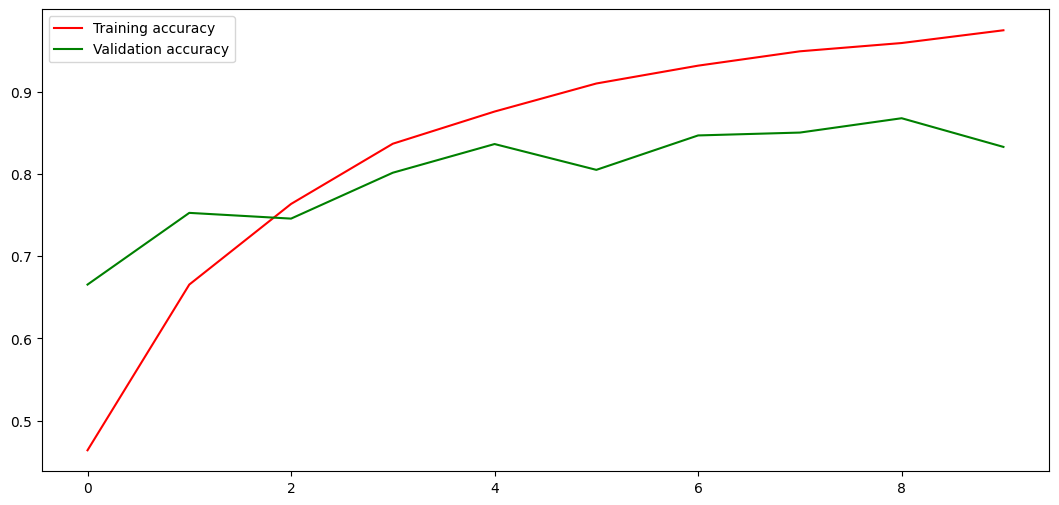

In [ ]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
fig = plt.figure(figsize=(13,6))
plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'g',label="Validation accuracy")
plt.legend(loc="upper left")
plt.show()

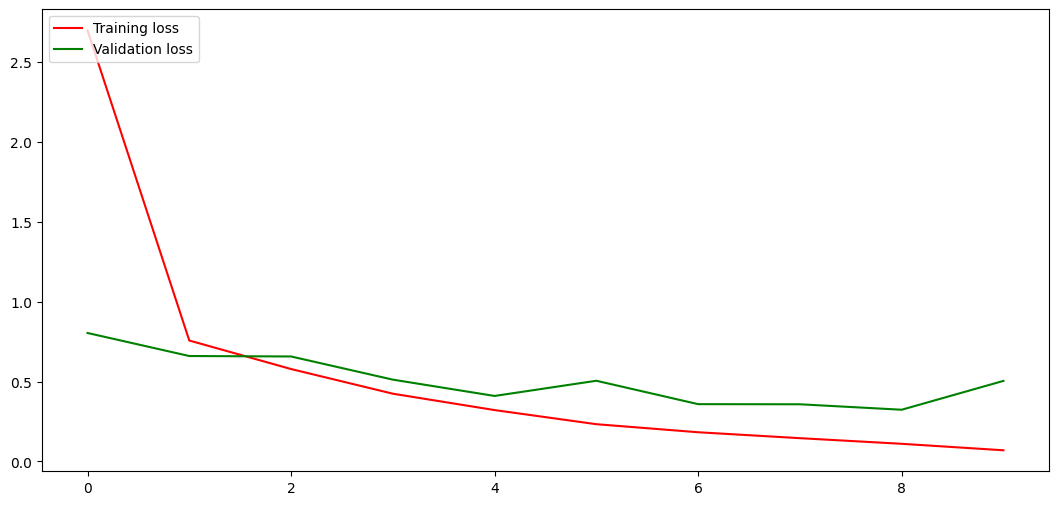

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(13,6))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'g',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# prediction

In [ ]:
img=cv2.imread('/content/brain-tumor-classification-mri/Testing/meningioma_tumor/image(109).jpg')
img=cv2.resize(img,(255,255))
img_array = np.array(img)
img_array = img_array.reshape(1,255,255,3)

In [ ]:
from tensorflow.keras.preprocessing import image

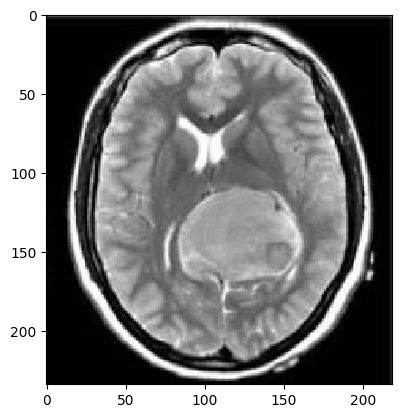

In [ ]:
img = image.load_img('/content/brain-tumor-classification-mri/Testing/meningioma_tumor/image(109).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=cnn.predict(img_array)
indeces = a.argmax()
if indeces == 0:
  print("prediction is Glioma_tumor")
elif indeces ==1:
  print("prediction is meningioma_tumor")
elif indeces ==2:
  print("prediction is No_tumor")
else:
  print("prediction is pituitary_tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
prediction is meningioma_tumor
